In [8]:
import pandas as pd

data = pd.read_csv('output.csv')

print(data.head())
print(data.info())

  CustomerID        CustomerName         Region  SignupDate  \
0      C0001    Lawrence Carroll  South America  2022-07-10   
1      C0002      Elizabeth Lutz           Asia  2022-02-13   
2      C0003      Michael Rivera  South America  2024-03-07   
3      C0004  Kathleen Rodriguez  South America  2022-10-09   
4      C0005         Laura Weber           Asia  2022-08-15   

   total_transactions  total_quantity  total_revenue  avg_transaction_value  \
0                   5              12        3354.52                670.904   
1                   4              10        1862.74                465.685   
2                   4              14        2725.38                681.345   
3                   8              23        5354.88                669.360   
4                   3               7        2034.24                678.080   

   product_variance  
0                 5  
1                 4  
2                 4  
3                 8  
4                 3  
<class 'pandas

In [9]:
# Preprocessing the data for clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy the dataset for preprocessing
preprocessed_data = data.copy()

# Convert 'SignupDate' to datetime and extract year as a feature
preprocessed_data['SignupYear'] = pd.to_datetime(preprocessed_data['SignupDate']).dt.year

# Drop unnecessary columns for clustering
columns_to_drop = ['CustomerID', 'CustomerName', 'SignupDate']
preprocessed_data = preprocessed_data.drop(columns=columns_to_drop)

# Encode categorical variables (e.g., 'Region')
label_encoder = LabelEncoder()
preprocessed_data['Region'] = label_encoder.fit_transform(preprocessed_data['Region'])

# Normalize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preprocessed_data)

# Display the preprocessed data
print("Preprocessed data ready for clustering:")
print(preprocessed_data.head())

Preprocessed data ready for clustering:
   Region  total_transactions  total_quantity  total_revenue  \
0       3                   5              12        3354.52   
1       0                   4              10        1862.74   
2       3                   4              14        2725.38   
3       3                   8              23        5354.88   
4       0                   3               7        2034.24   

   avg_transaction_value  product_variance  SignupYear  
0                670.904                 5        2022  
1                465.685                 4        2022  
2                681.345                 4        2024  
3                669.360                 8        2022  
4                678.080                 3        2022  


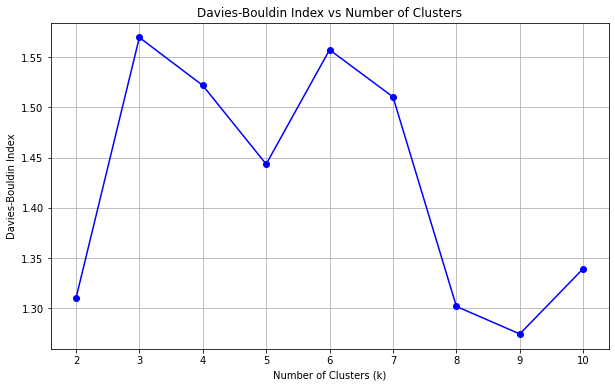

Optimal number of clusters: 9
Best Davies-Bouldin Index: 1.2745


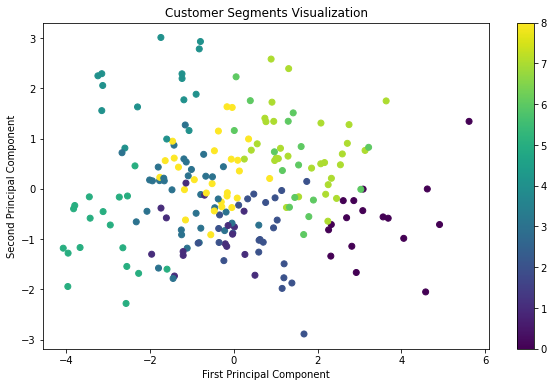

  CustomerID        CustomerName         Region  SignupDate  \
0      C0001    Lawrence Carroll  South America  2022-07-10   
1      C0002      Elizabeth Lutz           Asia  2022-02-13   
2      C0003      Michael Rivera  South America  2024-03-07   
3      C0004  Kathleen Rodriguez  South America  2022-10-09   
4      C0005         Laura Weber           Asia  2022-08-15   

   total_transactions  total_quantity  total_revenue  avg_transaction_value  \
0                   5              12        3354.52                670.904   
1                   4              10        1862.74                465.685   
2                   4              14        2725.38                681.345   
3                   8              23        5354.88                669.360   
4                   3               7        2034.24                678.080   

   product_variance  Cluster  
0                 5        1  
1                 4        3  
2                 4        8  
3                 8   

In [11]:
# Perform K-means clustering and calculate DB Index
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Find optimal number of clusters using DB Index
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    db_scores.append(davies_bouldin_score(scaled_data, clusters))

# Find optimal k
optimal_k = k_range[np.argmin(db_scores)]

# Fit final model with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = final_kmeans.fit_predict(scaled_data)

# Plot DB Index scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.grid(True)
plt.show()

print(f"Optimal number of clusters: {optimal_k}")
print(f"Best Davies-Bouldin Index: {min(db_scores):.4f}")

# Create visualization of clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Segments Visualization')
plt.colorbar(scatter)
plt.show()

# Add cluster labels to original data
data['Cluster'] = clusters
print(data.head())